# import statements

In [1]:
import torch.nn.functional as F
import torch
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import log_loss
import pandas as pd
#from scipy.optimize import fmin

# utils

In [2]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x,axis=1,keepdims=True)) 
    return e_x / np.sum(e_x,axis=1,keepdims=True)

In [3]:
def focus_(a,x):
  """
  focus function parametrized by a*x
  returns : averaged input for classification function
  """
  #print(a*x)
  out = softmax(a*x)
  #print(out)
  out = np.sum(out*x,axis=1)
  return out

def classification_(b,c,x):
  """
  classification function parametrized by b*x + c
  returns  : sigmoid(b*x+c)
  """
  out = (b*x) + c
  out = 1/(1+np.exp(-out))
  return out

In [4]:
def derv_g(xhat,y,yhat):
  """
  calculate derivate of log-loss with respect to b and c
  """
  #print(yhat,y,yhat-y)
  #print()
  db = np.dot(xhat,yhat-y)/xhat.shape[0]
  dc  = np.sum(yhat-y)/xhat.shape[0]
  return db,dc

In [5]:
def derv_f(x,xhat,y,yhat,a,b):
  """
  calculate derivative of log-loss with respect to a
  """
  da = np.sum((yhat-y)*b*(  ( (x[:,0] - x[:,1])* x[:,0] ) +  ( (x[:,1]- x[:,0]) * x[:,1] )   ) * (np.exp((a*x[:,0]+a*x[:,1]))/ (np.exp(a*x[:,0])+ np.exp(a*x[:,1]))**2 )) / xhat.shape[0] 
  
  #print(  (  ( (x[:,0] - x[:,1])* x[:,0] ) +  ( (x[:,1]- x[:,0]) * x[:,1] )   ) * (np.exp((a*x[:,0]+a*x[:,1]))/ (np.exp(a*x[:,0])+ np.exp(a*x[:,1]))**2 ) )
    
  return da

In [6]:
def gd(w,dw):
  """
  updates given parameter in negative direction of gradient
  """
  eta = 0.1
  return w - eta*dw

# m = 2

In [8]:
X = np.array([[-3,-1],[-1,-3],[1,-3],[-3,1]]) # mosaic data m = 2 , d= 1
Y = np.array([0,0,1,1])

In [41]:
def minimize_b_c(x,y,a,b,c):
  # b = 0 
  # c = 0 
  
  x_average = focus_(a,x)
  yhat = classification_(b,c,x_average)
  initial_loss = log_loss(y,yhat)

  for i in range(1000):
    x_average = focus_(a,x)
    yhat = classification_(b,c,x_average)
    if i ==0:
      print("x average at 0 epoch", x_average )
      print("yhat at 0 epoch",yhat)
      print("loss at 0 epoch",log_loss(y,yhat))
    der_b,der_c = derv_g(x_average,y,yhat)
    b = gd(b,der_b)
    c = gd(c,der_c)
    
    
    x_average = focus_(a,x)
    yhat = classification_(b,c,x_average)
    current_loss = log_loss(y,yhat) 

    if current_loss<= (initial_loss)/2:
      break
  print("   ")
  x_average = focus_(a,x)
  print("x average",x_average)
  yhat = classification_(b,c,x_average) 
  print("Y hat",yhat)
  current_loss  = log_loss(y,yhat)

  print("Loss",current_loss,i)
  
  return b,c,current_loss



In [42]:
def minimize_a(x,y,a,b,c):
  # b = 0 
  # c = 0 

  x_average = focus_(a,x)
  yhat = classification_(b,c,x_average)
  initial_loss = log_loss(y,yhat)

  for i in range(1000):
    x_average = focus_(a,x)
    yhat = classification_(b,c,x_average)
    if i ==0:
      print("x average at 0 epoch", x_average )
      print("yhat at 0 epoch",yhat)
      print("loss at 0 epoch",log_loss(y,yhat))
    der_a = derv_f(x,x_average,y,yhat,a,b)
    a = gd(a,der_a)

    x_average = focus_(a,x)
    yhat = classification_(b,c,x_average)
    current_loss = log_loss(y,yhat)
    if current_loss <= initial_loss/2:
      break 
  print("*"*60)
  x_average = focus_(a,x)
  print("x average",x_average)
  yhat = classification_(b,c,x_average) 
  print("Y hat",yhat)
  current_loss = log_loss(y,yhat)
  print("Loss",current_loss,i)
  return a,current_loss

In [16]:
xhat = focus_(-1,X)
print(xhat)
yhat = classification_(-20,0,xhat) 
print(yhat,Y)
print(np.double(yhat[0]) )
print(log_loss(Y,yhat))



[-2.76159416 -2.76159416 -2.92805516 -2.92805516]
[1. 1. 1. 1.] [0 0 1 1]
1.0
17.26978799617044


In [17]:
# -(np.log(1-yhat[0],) +  np.log(1-yhat[1]) + np.log(yhat[2])  +  np.log(yhat[3]) ) /4

In [18]:
a = np.linspace(-1,1,20)
b_list = []
c_list = []
loss_list = []
for a1 in a:
  #out =focus_(a1,X)
  #print(out)
  b,c,loss = minimize_b_c(X,Y,a=a1,b=0,c=0)
  b_list.append(b)
  c_list.append(c) 
  #out= classification_(0,0,out)
  #print(out)
  loss_list.append(loss)



x average at 0 epoch [-2.76159416 -2.76159416 -2.92805516 -2.92805516]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
   
x average [-2.76159416 -2.76159416 -2.92805516 -2.92805516]
Y hat [0.13300907 0.13300907 0.87374214 0.87374214]
Loss 0.13884837318936383 99999
x average at 0 epoch [-2.71372547 -2.71372547 -2.89140998 -2.89140998]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
   
x average [-2.71372547 -2.71372547 -2.89140998 -2.89140998]
Y hat [0.11613125 0.11613125 0.89022144 0.89022144]
Loss 0.11986586812718328 99999
x average at 0 epoch [-2.65811078 -2.65811078 -2.83687469 -2.83687469]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
   
x average [-2.65811078 -2.65811078 -2.83687469 -2.83687469]
Y hat [0.11137498 0.11137498 0.89484528 0.89484528]
Loss 0.11459219045597935 99999
x average at 0 epoch [-2.59424986 -2.59424986 -2.7566637  -2.7566637 ]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453

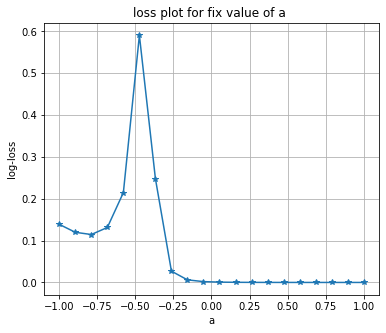

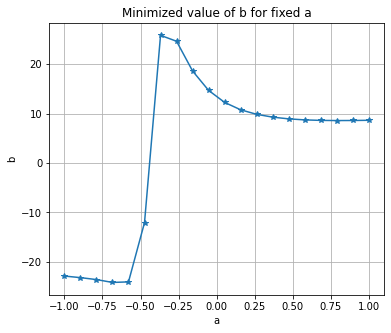

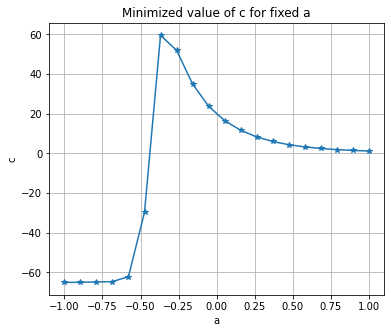

In [20]:
a = np.linspace(-1,1,20)
plt.figure(figsize=(6,5))
plt.plot(a,loss_list,"*-")
plt.grid()
#plt.xticks(a)
plt.xlabel("a")
plt.ylabel("log-loss")
plt.title("loss plot for fix value of a ")
plt.savefig("loss_fixed_a.png")

plt.figure(figsize=(6,5))
plt.plot(a,b_list,"*-")
plt.grid()
#plt.xticks(a)
plt.xlabel("a")
plt.ylabel("b")
plt.title("Minimized value of b for fixed a")
plt.savefig("minimized_b_fixed_a.png")


plt.figure(figsize=(6,5))
plt.plot(a,c_list,"*-")
plt.grid()
plt.xlabel("a")
plt.ylabel("c")
plt.title("Minimized value of c for fixed a")
plt.savefig("minimized_c_fixed_a.png")



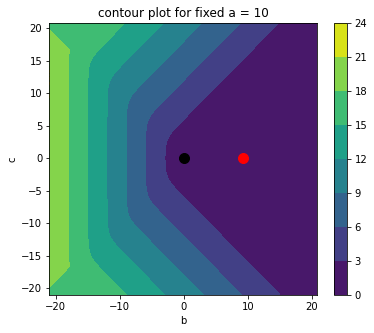

In [26]:
loss_ = []
bb,cc= np.meshgrid(np.arange(-21,21,0.2),np.arange(-21,21,0.2))
b_ = bb.reshape(-1,1)
c_ = cc.reshape(-1,1) 
a_ = 10
x_average_ = focus_(a_,X)
yhat_  = classification_(b_,c_,x_average_) 
#print("Y hat",yhat_)
#Y_ = np.array([list(Y)]*40000)
for i in range(yhat_.shape[0]):
  loss_.append(log_loss(Y,yhat_[i]))
loss_ = np.array(loss_)#,axis=0)
plt.figure(figsize=(6,5))
cs = plt.contourf(b_.reshape(bb.shape),c_.reshape(cc.shape),loss_.reshape(bb.shape))
plt.xlabel("b")
plt.ylabel("c")
plt.colorbar(cs)

plt.scatter(0, 0,c="black",s=100)
plt.scatter(9.209561733042195, 1.691966914794777e-08,c="r",s=100)

plt.title("contour plot for fixed a = "+str(a_) )

plt.savefig("contour_b_c_a_10.png")


In [25]:
minimize_b_c(X,Y,10,0,0)

x average at 0 epoch [-1. -1.  1.  1.]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
   
x average [-1. -1.  1.  1.]
Y hat [1.00067878e-04 1.00067878e-04 9.99899932e-01 9.99899932e-01]
Loss 0.00010007288485731557 99999


(9.209561733042195, 1.691966914794777e-08, 0.00010007288485731557)

In [27]:
# minimize_a(X,Y,0,8.64,12.735)

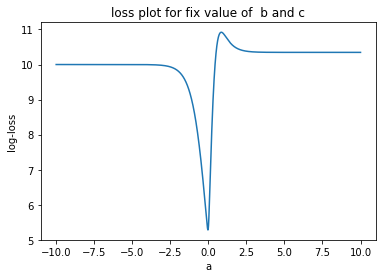

In [40]:
a = np.linspace(-10,10,5000)
loss = []
for a1 in a:
  out =focus_(a1,X)
  #print(out)
  out = classification_(-10,-10,out)
  #print(out)
  loss.append(log_loss(Y,out,))

plt.plot(a,loss)
plt.xlabel("a")
plt.ylabel("log-loss")
plt.title("loss plot for fix value of  b and c")
plt.savefig("loss_landscape_b_n10_c_n10.png")

In [ ]:
# b = np.linspace(-10,10,20)
# c = np.linspace(-10,10,20)
# a_list = []
# #c_list = []
# loss_list = []
# for b1 in b:
#   for c1 in c:
#     a,loss = minimize_a(X,Y,a=0,b=b1,c=c1)
#     a_list.append(a)
#     #c_list.append(c) 
#     #out= classification_(0,0,out)
#     #print(out)
#     loss_list.append(loss)

In [ ]:
# bb,cc= np.meshgrid(b,c)
# len(loss_list)

400

In [ ]:
# from mpl_toolkits import mplot3d


# fig = plt.figure()
# ax = plt.axes(projection='3d')

# ax.plot3D(bb.reshape((400)),cc.reshape((400)),loss_list, 'gray')

# ax.set_xlabel('b')
# ax.set_ylabel('c')
# ax.set_zlabel('log-loss');

In [ ]:
# def func_(w):  # only for m = 2
#   return -2*(np.log(1-w[0]-w[1]) + np.log(2*(w[0]+w[1])))  # w[0 ] is b  and w[1] = c


# fmin(func_,[2,0.1],) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


array([2. , 0.1])

# Alternate minimization

In [43]:
a = 0
b = 0
c = 0  

data = pd.DataFrame(columns=["sno","b_c_fixed","a_fixed","a_value","b_value","c_value","loss"]) 

X_average = focus_(a,X)
Yhat = classification_(b,c,X_average)
initial_loss = log_loss(Y,Yhat)

k = 0 
data.loc[k] = [k,True,True,a,b,c,initial_loss]
k = k+1
j= 1

for i in range(0,40,2):
  print("Minimize b and c")
  b,c,loss = minimize_b_c(X,Y,a,b,c)
  data.loc[k] = [j,False,True,a,b,c,loss]
  print("*"*60)
  print("  ")
  print("minimize a")
  a,loss = minimize_a(X,Y,a,b,c)
  data.loc[k+1] = [j,True,False,a,b,c,loss]
  print("  ")
  k = k+2
  j = j+1

Minimize b and c
x average at 0 epoch [-2. -2. -1. -1.]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
   
x average [-2. -2. -1. -1.]
Y hat [0.22196633 0.22196633 0.64314472 0.64314472]
Loss 0.3461855002856155 293
************************************************************
  
minimize a
x average at 0 epoch [-2. -2. -1. -1.]
yhat at 0 epoch [0.22196633 0.22196633 0.64314472 0.64314472]
loss at 0 epoch 0.3461855002856155
************************************************************
x average [-1.75603438 -1.75603438 -0.07895726 -0.07895726]
Y hat [0.30905387 0.30905387 0.90777642 0.90777642]
Loss 0.23322528817610402 999
  
Minimize b and c
x average at 0 epoch [-1.75603438 -1.75603438 -0.07895726 -0.07895726]
yhat at 0 epoch [0.30905387 0.30905387 0.90777642 0.90777642]
loss at 0 epoch 0.23322528817610402
   
x average [-1.75603438 -1.75603438 -0.07895726 -0.07895726]
Y hat [0.10871073 0.10871073 0.88893387 0.88893387]
Loss 0.11640933548832642 42
*****************

In [44]:
data

,sno,b_c_fixed,a_fixed,a_value,b_value,c_value,loss
0,0,True,True,0,0,0,0.693147
1,1,False,True,0,1.84328,2.43232,0.346186
2,1,True,False,0.248986,1.84328,2.43232,0.233225
3,2,False,True,0.248986,2.49474,2.27688,0.116409
4,2,True,False,0.372226,2.49474,2.27688,0.100653
5,3,False,True,0.372226,3.10774,2.15229,0.050309
6,3,True,False,0.464734,3.10774,2.15229,0.045757
7,4,False,True,0.464734,3.71744,2.05254,0.022854
8,4,True,False,0.540376,3.71744,2.05254,0.021371
9,5,False,True,0.540376,4.33127,1.97533,0.010680


In [45]:
data.to_csv("data_2_1.csv",index=False)

In [46]:
a = 0
b = 0
c = 0  

data_1 = pd.DataFrame(columns=["sno","b_c_fixed","a_fixed","a_value","b_value","c_value","loss"]) 

X_average = focus_(a,X)
Yhat = classification_(b,c,X_average)
initial_loss = log_loss(Y,Yhat)

k = 0 
data_1.loc[k] = [k,True,True,a,b,c,initial_loss]
k = k+1
j= 1

for i in range(0,40,2):


  print("minimize a")
  a,loss = minimize_a(X,Y,a,b,c)
  data_1.loc[k+1] = [j,True,False,a,b,c,loss]
  print("*"*60)
  print("  ")
  
  print("Minimize b and c")
  b,c,loss = minimize_b_c(X,Y,a,b,c)
  data_1.loc[k] = [j,False,True,a,b,c,loss]
  print("  ")
  k = k+2
  j = j+1

minimize a
x average at 0 epoch [-2. -2. -1. -1.]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
************************************************************
x average [-2. -2. -1. -1.]
Y hat [0.5 0.5 0.5 0.5]
Loss 0.6931471805599453 999
************************************************************
  
Minimize b and c
x average at 0 epoch [-2. -2. -1. -1.]
yhat at 0 epoch [0.5 0.5 0.5 0.5]
loss at 0 epoch 0.6931471805599453
   
x average [-2. -2. -1. -1.]
Y hat [0.22196633 0.22196633 0.64314472 0.64314472]
Loss 0.3461855002856155 293
  
minimize a
x average at 0 epoch [-2. -2. -1. -1.]
yhat at 0 epoch [0.22196633 0.22196633 0.64314472 0.64314472]
loss at 0 epoch 0.3461855002856155
************************************************************
x average [-1.75603438 -1.75603438 -0.07895726 -0.07895726]
Y hat [0.30905387 0.30905387 0.90777642 0.90777642]
Loss 0.23322528817610402 999
************************************************************
  
Minimize b and c
x aver

In [47]:
data_1.to_csv("data_2_2.csv",index=False)

In [48]:
data_1

,sno,b_c_fixed,a_fixed,a_value,b_value,c_value,loss
0,0,True,True,0,0,0,0.693147
2,1,True,False,0,0,0,0.693147
1,1,False,True,0,1.84328,2.43232,0.346186
4,2,True,False,0.248986,1.84328,2.43232,0.233225
3,2,False,True,0.248986,2.49474,2.27688,0.116409
6,3,True,False,0.372226,2.49474,2.27688,0.100653
5,3,False,True,0.372226,3.10774,2.15229,0.050309
8,4,True,False,0.464734,3.10774,2.15229,0.045757
7,4,False,True,0.464734,3.71744,2.05254,0.022854
10,5,True,False,0.540376,3.71744,2.05254,0.021371


# m = 9

In [ ]:
X1 = np.array([[-1,3,3,3,3,3,3,3,3],[1,3,3,3,3,3,3,3,3],
               [3,-1,3,3,3,3,3,3,3],[3,1,3,3,3,3,3,3,3],
               [3,3,-1,3,3,3,3,3,3],[3,3,1,3,3,3,3,3,3],
               [3,3,3,-1,3,3,3,3,3],[3,3,3,1,3,3,3,3,3],
               [3,3,3,3,-1,3,3,3,3],[3,3,3,3,1,3,3,3,3],
               [3,3,3,3,3,-1,3,3,3],[3,3,3,3,3,1,3,3,3],
               [3,3,3,3,3,3,-1,3,3],[3,3,3,3,3,3,1,3,3],
               [3,3,3,3,3,3,3,-1,3],[3,3,3,3,3,3,3,1,3],
               [3,3,3,3,3,3,3,3,-1],[3,3,3,3,3,3,3,3,1],]) # mosaic data m = 9 , d= 1
Y1 = np.array([0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1])

# m = 50

In [ ]:
X2 = np.ones((50,50))*3
idx = np.arange(0,50,1)
X2[idx,idx] =  -1

X3 = np.ones((50,50))*3
X3[idx,idx] =  1

X3 = np.concatenate((X2,X3),axis=0)
print(X3,X3.shape)

Y3 = np.zeros((100))
Y3[50:] = 1
print(Y3,Y3.shape)

[[-1.  3.  3. ...  3.  3.  3.]
 [ 3. -1.  3. ...  3.  3.  3.]
 [ 3.  3. -1. ...  3.  3.  3.]
 ...
 [ 3.  3.  3. ...  1.  3.  3.]
 [ 3.  3.  3. ...  3.  1.  3.]
 [ 3.  3.  3. ...  3.  3.  1.]] (100, 50)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.] (100,)


In [ ]:
def softmax_(x):
    """Compute softmax values for each sets of scores in x."""
    m =  torch.max(x,dim=1,keepdims=True) 
    print(m)
    e_x = torch.exp(torch.sub(x,m.values)) 
    return e_x / torch.sum(e_x,dim=1,keepdims=True)

In [ ]:
a = torch.tensor([10.],requires_grad=True)
x = torch.tensor([[3.,-1.]])
out = torch.sum(softmax_(a*x) * x,dim=1)
print(out)

torch.return_types.max(
values=tensor([[30.]], grad_fn=<MaxBackward0>),
indices=tensor([[0]]))
tensor([3.], grad_fn=<SumBackward1>)


In [ ]:
out.backward()

In [ ]:
a.grad

tensor([6.7974e-17])

In [ ]:
l = ( torch.exp(a*x[0,0],) + torch.exp(a*x[0,1]) ) **2


#print(l)


f1 = ( ( ( x[0,0] - x[0,1] ) * torch.exp(a*x[0,0] + a*x[0,1]) ) / l  ) * x[0,0]

f2 = ( ( ( x[0,1] - x[0,0] ) * torch.exp(a*x[0,0] + a*x[0,1]) ) / l  ) * x[0,1]
print(f1.item()+f2.item())

6.797367106130223e-17


In [ ]:
x = np.array([[3,-1]])
a = 10
b = 1
c = 0
y = np.array([1])
xhat = np.sum(softmax(a*x) * x,axis=1)
print(xhat)
yhat = classification_(b,c,xhat)

[3.]


In [ ]:
derv_f(x,xhat,y,yhat,a,b)

[6.79736681e-17]


-3.223710561997351e-18